In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import LinearSVR
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [119]:
from google.colab import files
files.upload()


Saving New_Train_ticket_price_prediction.csv to New_Train_ticket_price_prediction (2).csv


{'New_Train_ticket_price_prediction.csv': b'\xef\xbb\xbfinsert_date,source,destination,departure,arrival,fare(Taka),train_class\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/2/22 10:15 AM,3/2/22 4:35 PM,255,S_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/2/22 10:15 AM,3/2/22 4:35 PM,561,AC_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/3/22 10:15 AM,3/3/22 4:35 PM,255,S_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/3/22 10:15 AM,3/3/22 4:35 PM,561,AC_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/4/22 10:15 AM,3/4/22 4:35 PM,255,S_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/4/22 10:15 AM,3/4/22 4:35 PM,561,AC_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/5/22 10:15 AM,3/5/22 4:35 PM,255,S_S\r\n3/1/22 10:50 PM,SYLHET,COMILLA,3/5/22 10:15 AM,3/5/22 4:35 PM,561,AC_S\r\n3/1/22 10:50 PM,SYLHET,QOSBA,3/2/22 10:15 AM,3/2/22 3:45 PM,225,S_S\r\n3/1/22 10:50 PM,SYLHET,BRAHMAN_BARIA,3/2/22 3:45 PM,3/2/22 8:34 PM,417,SNIGDHA\r\n3/1/22 10:50 PM,SYLHET,BRAHMAN_BARIA,3/2/22 11:15 AM,3/2/22 4:23 PM,230,S_S\r\n3/1/22 10:50 PM,SYLHET,BRAHMAN_BARIA,3/4/22 11:15

In [124]:
data = pd.read_csv('New_Train_ticket_price_prediction.csv')
print(data)

        insert_date    source destination        departure          arrival  \
0    3/1/2022 22:50    SYLHET     COMILLA   3/2/2022 10:15   3/2/2022 16:35   
1    3/1/2022 22:50    SYLHET     COMILLA   3/2/2022 10:15   3/2/2022 16:35   
2    3/1/2022 22:50    SYLHET     COMILLA   3/3/2022 10:15   3/3/2022 16:35   
3    3/1/2022 22:50    SYLHET     COMILLA   3/3/2022 10:15   3/3/2022 16:35   
4    3/1/2022 22:50    SYLHET     COMILLA   3/4/2022 10:15   3/4/2022 16:35   
..              ...       ...         ...              ...              ...   
595  3/28/2022 9:00  RAJSHAHI       DHAKA   3/29/2022 7:40  3/29/2022 13:30   
596  3/28/2022 9:00  RAJSHAHI       DHAKA   3/29/2022 7:40  3/29/2022 13:30   
597  3/28/2022 9:00  RAJSHAHI       DHAKA   3/29/2022 7:40  3/29/2022 13:30   
598  3/28/2022 9:00   COMILLA  CHITTAGONG  3/30/2022 11:05  3/30/2022 14:00   
599  3/28/2022 9:00   COMILLA  CHITTAGONG  3/30/2022 11:05  3/30/2022 14:00   

     fare(Taka) train_class  
0           255      

**Number of people boarding from different stations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


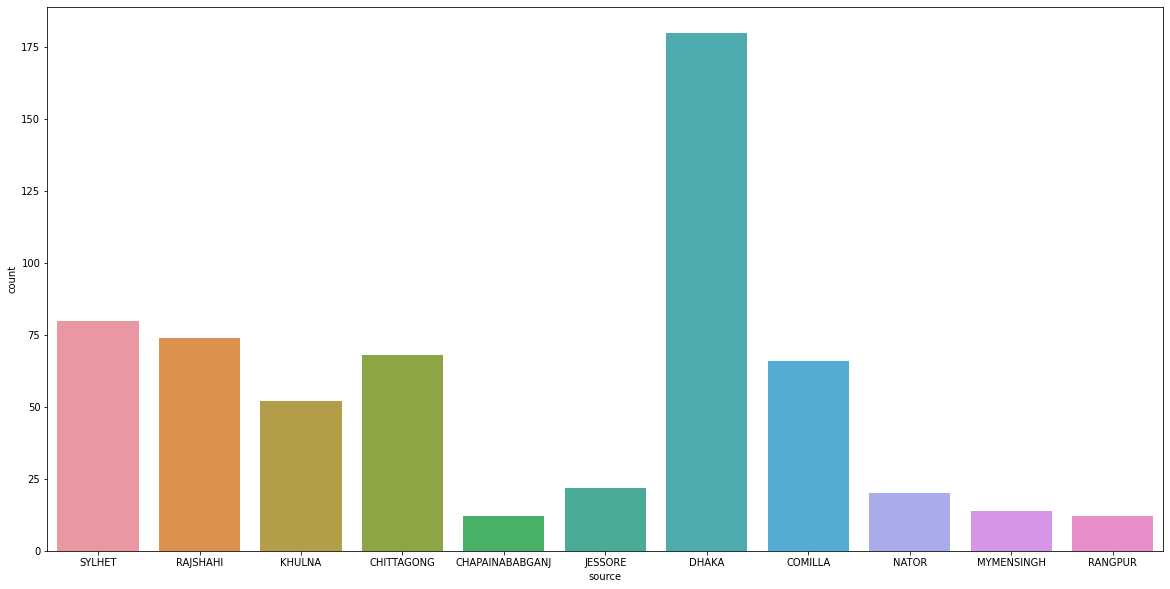

In [121]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data['source'])
plt.show()



**Number of people having the following stations as destination**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


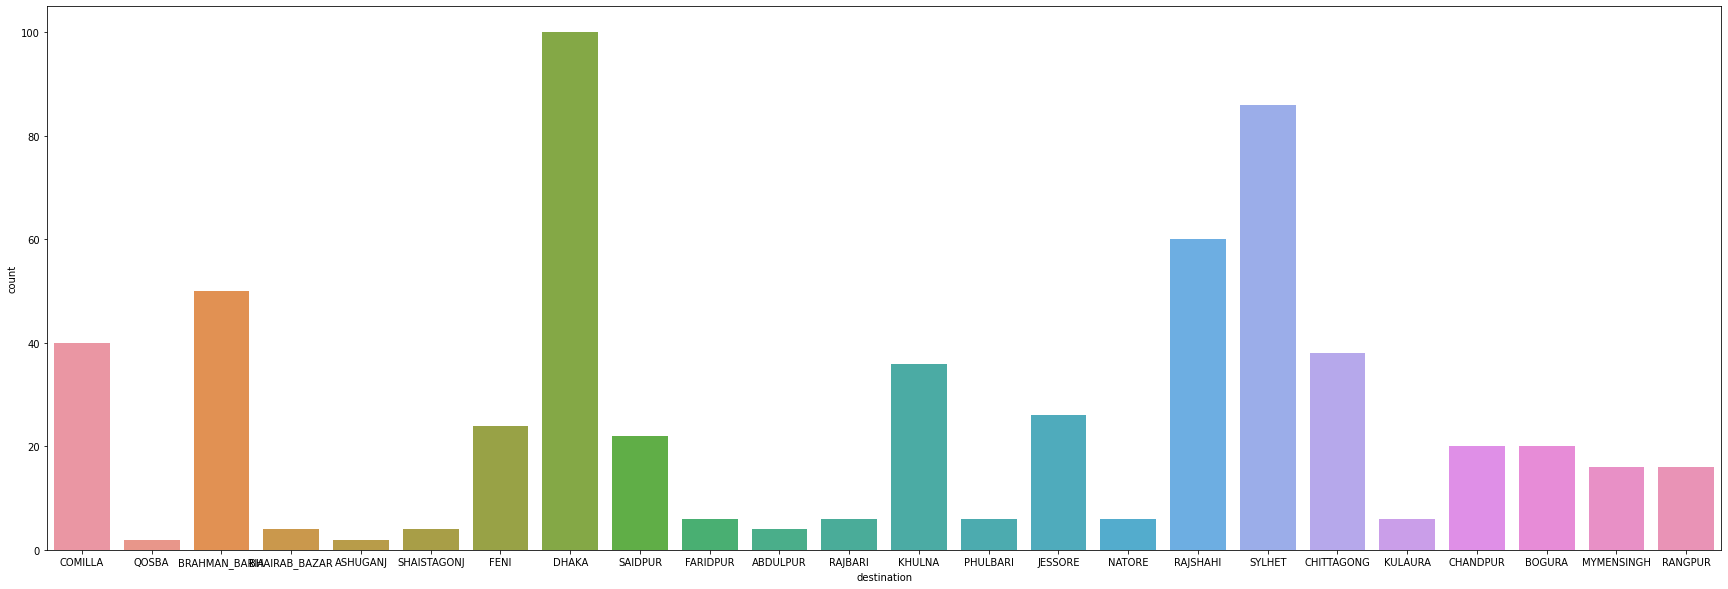

In [122]:
fig,ax = plt.subplots(figsize=(30,10))
ax = sns.countplot(data['destination'])
plt.show()

**Number of train of different class**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


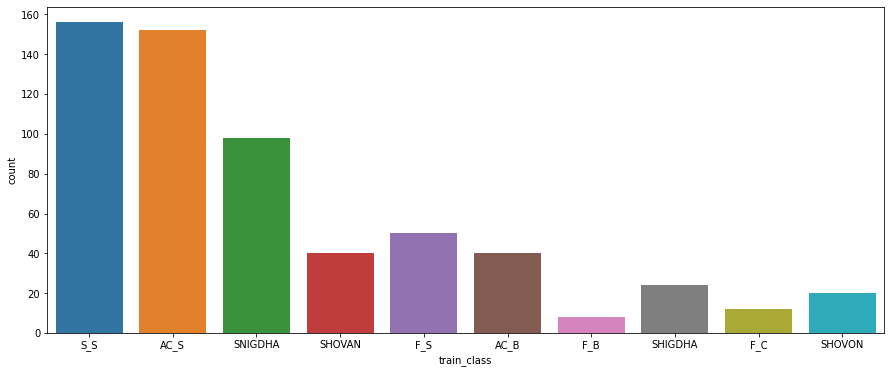

In [123]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(data['train_class'])
plt.show()

In [125]:
lab_en = LabelEncoder()
data.iloc[:,1] = lab_en.fit_transform(data.iloc[:,1])
data.iloc[:,2] = lab_en.fit_transform(data.iloc[:,2])
data.iloc[:,3] = lab_en.fit_transform(data.iloc[:,3])
data.iloc[:,4] = lab_en.fit_transform(data.iloc[:,4])
data.iloc[:,6] = lab_en.fit_transform(data.iloc[:,6])

data




,insert_date,source,destination,departure,arrival,fare(Taka),train_class
0,3/1/2022 22:50,10,7,6,9,255,9
1,3/1/2022 22:50,10,7,6,9,561,1
2,3/1/2022 22:50,10,7,15,33,255,9
3,3/1/2022 22:50,10,7,15,33,561,1
4,3/1/2022 22:50,10,7,25,54,255,9
...,...,...,...,...,...,...,...
595,3/28/2022 9:00,8,8,13,15,676,8
596,3/28/2022 9:00,8,8,13,15,676,8
597,3/28/2022 9:00,8,8,13,15,676,8
598,3/28/2022 9:00,2,6,24,50,411,1


In [126]:

X = data.iloc[:, [1,2,3,4,6]].astype(int)
y = data.iloc[:, 5].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

print(X_train)
print('\n')
print(X_test)

#print(y_train)
#print('\n')
#print(y_test)
#print(data)




     source  destination  departure  arrival  train_class
122       3           23         20       40            6
491       3            3         17       18            9
367       1           23         49       74            1
381       4           21         46       80            0
71        1            4         45       64            1
..      ...          ...        ...      ...          ...
183       2           23         14       21            7
412       3           10         19       35            6
284       3           20         11       13            1
566       6            8          5        6            4
206       3           12         50       75            9

[420 rows x 5 columns]


     source  destination  departure  arrival  train_class
187       2           23         17       21            1
300      10            7          6        9            9
402       3            6         17       27            4
332       8           18         44       63  

**Linear Regression** 

In [127]:

model = LinearRegression()
model.fit(X_train, y_train)

#print(model.score(X_test,y_test))

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(model):
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()

    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

evaluate(model)



Train Score: 0.2991846893464699
Test Score: 0.30244165788107136



**Compute Mean Squared Error**

In [129]:
def compute_mse(model, X, y_true, name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {name}: {mse}')
    
#compute_mse(model, X_train, y_train, 'training set')
compute_mse(model, X_test, y_test, 'test set')

Mean Squared Error for test set: 80865.23575703791


**Compute Root Mean Squared Error**

In [130]:
def compute_rmse(model, X, y_true, name):
    y_pred = model.predict(X)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    print(f'Root Mean Squared Error for {name}: {rmse}')
    
#compute_mse(model, X_train, y_train, 'training set')
compute_rmse(model, X_test, y_test, 'test set')


Root Mean Squared Error for test set: 284.36813421520685


**Compute Mean Absolute Error**

In [131]:
def compute_mae(model, X, y_test, name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')
    #print(mae)
    
#compute_mae(model, X_train, y_train, 'training set')
compute_mae(model, X_test, y_test, 'test set')


Mean Absolute Error for test set: 219.93224335838934


**Compute R2 Score**

In [132]:
def compute_r2_score(model, X, y_true, name):
    y_pred = model.predict(X)
    r2=r2_score(y_true,y_pred)
    print(f'R2 Score for {name}: {r2}')
    
compute_r2_score(model, X_test, y_test, 'test set')

R2 Score for test set: 0.30244165788107136


**Gradient Boosting**

In [133]:
gbr = LGBMRegressor(n_estimators=100)
gbr.fit(X_train, y_train)

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(gbr):
        train_score = gbr.score(X_train, y_train)
        test_score = gbr.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()
        
        #compute_mse(model, X_train, y_train, 'training set')
        #compute_mse(model, X_test, y_test, 'test set')
    
    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

evaluate(gbr)


Train Score: 0.9686396166009446
Test Score: 0.9215295692037849



**Compute Mean Squared Error**

In [134]:
def compute_mse(gbr, X, y_true, name):
    y_pred = gbr.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {name}: {mse}')
    

compute_mse(gbr, X_test, y_test, 'test set')

Mean Squared Error for test set: 9096.772991083224


**Compute Root Mean Squared Error**

In [135]:
def compute_rmse(gbr, X, y_true, name):
    y_pred = gbr.predict(X)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    print(f'Root Mean Squared Error for {name}: {rmse}')
    
#compute_mse(model, X_train, y_train, 'training set')
compute_rmse(gbr, X_test, y_test, 'test set')

Root Mean Squared Error for test set: 95.37700451934535


**Compute Mean Absolute Error**

In [136]:
def compute_mae(gbr, X, y_test, name):
    y_pred = gbr.predict(X)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')
    
#compute_mae(model, X_train, y_train, 'training set')
compute_mae(gbr, X_test, y_test, 'test set')



Mean Absolute Error for test set: 57.50223685358709


**Compute R2 Score**

In [137]:
def compute_r2_score(gbr, X, y_true, name):
    y_pred = gbr.predict(X)
    r2=r2_score(y_true,y_pred)
    print(f'R2 Score for {name}: {r2}')
    
compute_r2_score(gbr, X_test, y_test, 'test set')

R2 Score for test set: 0.9215295692037849


**Support Vector Regression**

In [138]:
svr = LinearSVR()
svr.fit(X_train, y_train);

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(svr):
        train_score = svr.score(X_train, y_train)
        test_score = svr.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()

    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

evaluate(svr)


Train Score: 0.06440781940820095
Test Score: 0.06453607776833858



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


**Compute Mean Squared Error**

In [139]:
def compute_mse(svr, X, y_true, name):
    y_pred = svr.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {name}: {mse}')
    

compute_mse(svr, X_test, y_test, 'test set')

Mean Squared Error for test set: 108444.70784146897


**Compute Root Mean Squared Error**

In [140]:
def compute_rmse(svr, X, y_true, name):
    y_pred = svr.predict(X)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    print(f'Root Mean Squared Error for {name}: {rmse}')
    

compute_rmse(svr, X_test, y_test, 'test set')

Root Mean Squared Error for test set: 329.30944086295034


**Compute Mean Absolute Error**

In [141]:
def compute_mae(svr, X, y_test, name):
    y_pred = svr.predict(X)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')
    
compute_mae(svr, X_test, y_test, 'test set')


Mean Absolute Error for test set: 231.51803213228212


**Compute R2 Score**

In [142]:
def compute_r2_score(svr, X, y_true, name):
    y_pred = svr.predict(X)
    r2=r2_score(y_true,y_pred)
    print(f'R2 Score for {name}: {r2}')
    
compute_r2_score(svr, X_test, y_test, 'test set')

R2 Score for test set: 0.06453607776833858


**Decision tree regression**

In [143]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(regressor):
        train_score = regressor.score(X_train, y_train)
        test_score = regressor.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()

    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

evaluate(regressor)


Train Score: 0.9995406394499095
Test Score: 0.9217129807390462



**Compute Mean Squared Error**

In [144]:
def compute_mse(regressor, X, y_true, name):
    y_pred = regressor.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {name}: {mse}')
    

compute_mse(regressor, X_test, y_test, 'test set')

Mean Squared Error for test set: 9075.510802469136


**Compute Root Mean Squared Error**

In [145]:
def compute_rmse(regressor, X, y_true, name):
    y_pred = regressor.predict(X)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    print(f'Root Mean Squared Error for {name}: {rmse}')
    

compute_rmse(regressor, X_test, y_test, 'test set')

Root Mean Squared Error for test set: 95.26547539622702


**Compute Mean Absolute Error**

In [146]:
def compute_mae(regressor, X, y_test, name):
    y_pred = regressor.predict(X)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')
    
compute_mae(regressor, X_test, y_test, 'test set')

Mean Absolute Error for test set: 30.372222222222224


**Compute R2 Score**

In [147]:

def compute_r2_score(regressor, X, y_true, name):
    y_pred = regressor.predict(X)
    r2=r2_score(y_true,y_pred)
    print(f'R2 Score for {name}: {r2}')
    
compute_r2_score(regressor, X_test, y_test, 'test set')

R2 Score for test set: 0.9217129807390462


**Random Forest**

In [148]:
forest = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

def build_evaluate_fn(X_train, y_train, X_test, y_test):
    def evaluate(forest):
        train_score = forest.score(X_train, y_train)
        test_score = forest.score(X_test, y_test)

        print("Train Score:", train_score)
        print("Test Score:", test_score)
        print()

    return evaluate

evaluate = build_evaluate_fn(X_train, y_train, X_test, y_test)

evaluate(forest)



Train Score: 0.9912782458310816
Test Score: 0.9309380418361768



**Compute Mean Squared Error**

In [149]:
def compute_mse(forest, X, y_true, name):
    y_pred = forest.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {name}: {mse}')
    
compute_mse(forest, X_test, y_test, 'test set')

Mean Squared Error for test set: 8006.085214028024


**Compute Root Mean Squared Error**

In [150]:
def compute_rmse(forest, X, y_true, name):
    y_pred = forest.predict(X)
    rmse=np.sqrt(mean_squared_error(y_true,y_pred))
    print(f'Root Mean Squared Error for {name}: {rmse}')
    

compute_rmse(forest, X_test, y_test, 'test set')

Root Mean Squared Error for test set: 89.47673001416639


**Compute Mean Absolute Error**

In [151]:
def compute_mae(forest, X, y_test, name):
    y_pred = forest.predict(X)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error for {name}: {mae}')
    
compute_mae(forest, X_test, y_test, 'test set')



Mean Absolute Error for test set: 46.06137457943291


**Compute R2 Score**

In [152]:
def compute_r2_score(forest, X, y_true, name):
    y_pred = forest.predict(X)
    r2=r2_score(y_true,y_pred)
    print(f'R2 Score for {name}: {r2}')
    
compute_r2_score(forest, X_test, y_test, 'test set')

R2 Score for test set: 0.9309380418361768
